In [12]:
%autosave 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'], test_size = 0.2, random_state = 42)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [6]:
y_pred = lr.predict_log_proba(X_test)
y_pred

array([[-0.14022225, -2.03381862],
       [-0.05676081, -2.89715536],
       [-0.41111768, -1.0874021 ],
       ...,
       [-0.32785038, -1.27464856],
       [-0.2164543 , -1.63665157],
       [-0.13162984, -2.09285465]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [8]:
roc_score = roc_auc_score(y_test, y_pred[:,1])
roc_score

0.6302043467866831

_________________________________________________________________________
**Now, plot the ROC curve.**


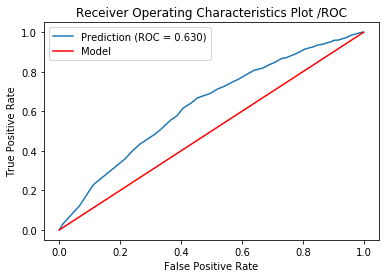

In [29]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred[:,1])

plt.plot(fpr, tpr, label='Prediction (ROC = %0.3f)' % roc_score)
plt.plot([0, 1], [0, 1], label='Model',color='red')

plt.title('Receiver Operating Characteristics Plot /ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [13]:
precision = average_precision_score(y_test, y_pred[:,1])
print("AVERAGE PRECISION - RECALL SCORE: ", precision)

AVERAGE PRECISION - RECALL SCORE:  0.2972619433622674


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


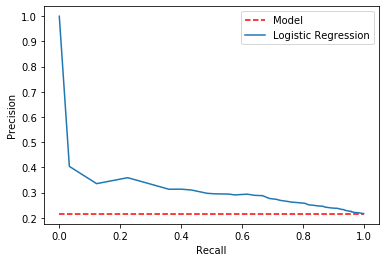

In [24]:
model = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [model, model], linestyle='--', label='Model',color='red')
precision, recall, _ = precision_recall_curve(y_test, y_pred[:,1])
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [27]:
auc_score = auc(recall, precision)
print('Logistic Regression Precission - Recall: ', auc_score)

Logistic Regression Precission - Recall:  0.31275283839480245


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [28]:
y_pred_train = lr.predict_proba(X_train)
ruc_score_train=roc_auc_score(y_train,y_pred_train[:,1])
ruc_score_train


0.6158375447898838

    How is this different, conceptually and quantitatively, from your earlier calculation?
